# Step 1: Reading the data

In [123]:
# Import pandas and matplotlib.pyplot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load train.csv as a pandas DataFrame.
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

# Step 2: Cleaning the data

<Axes: >

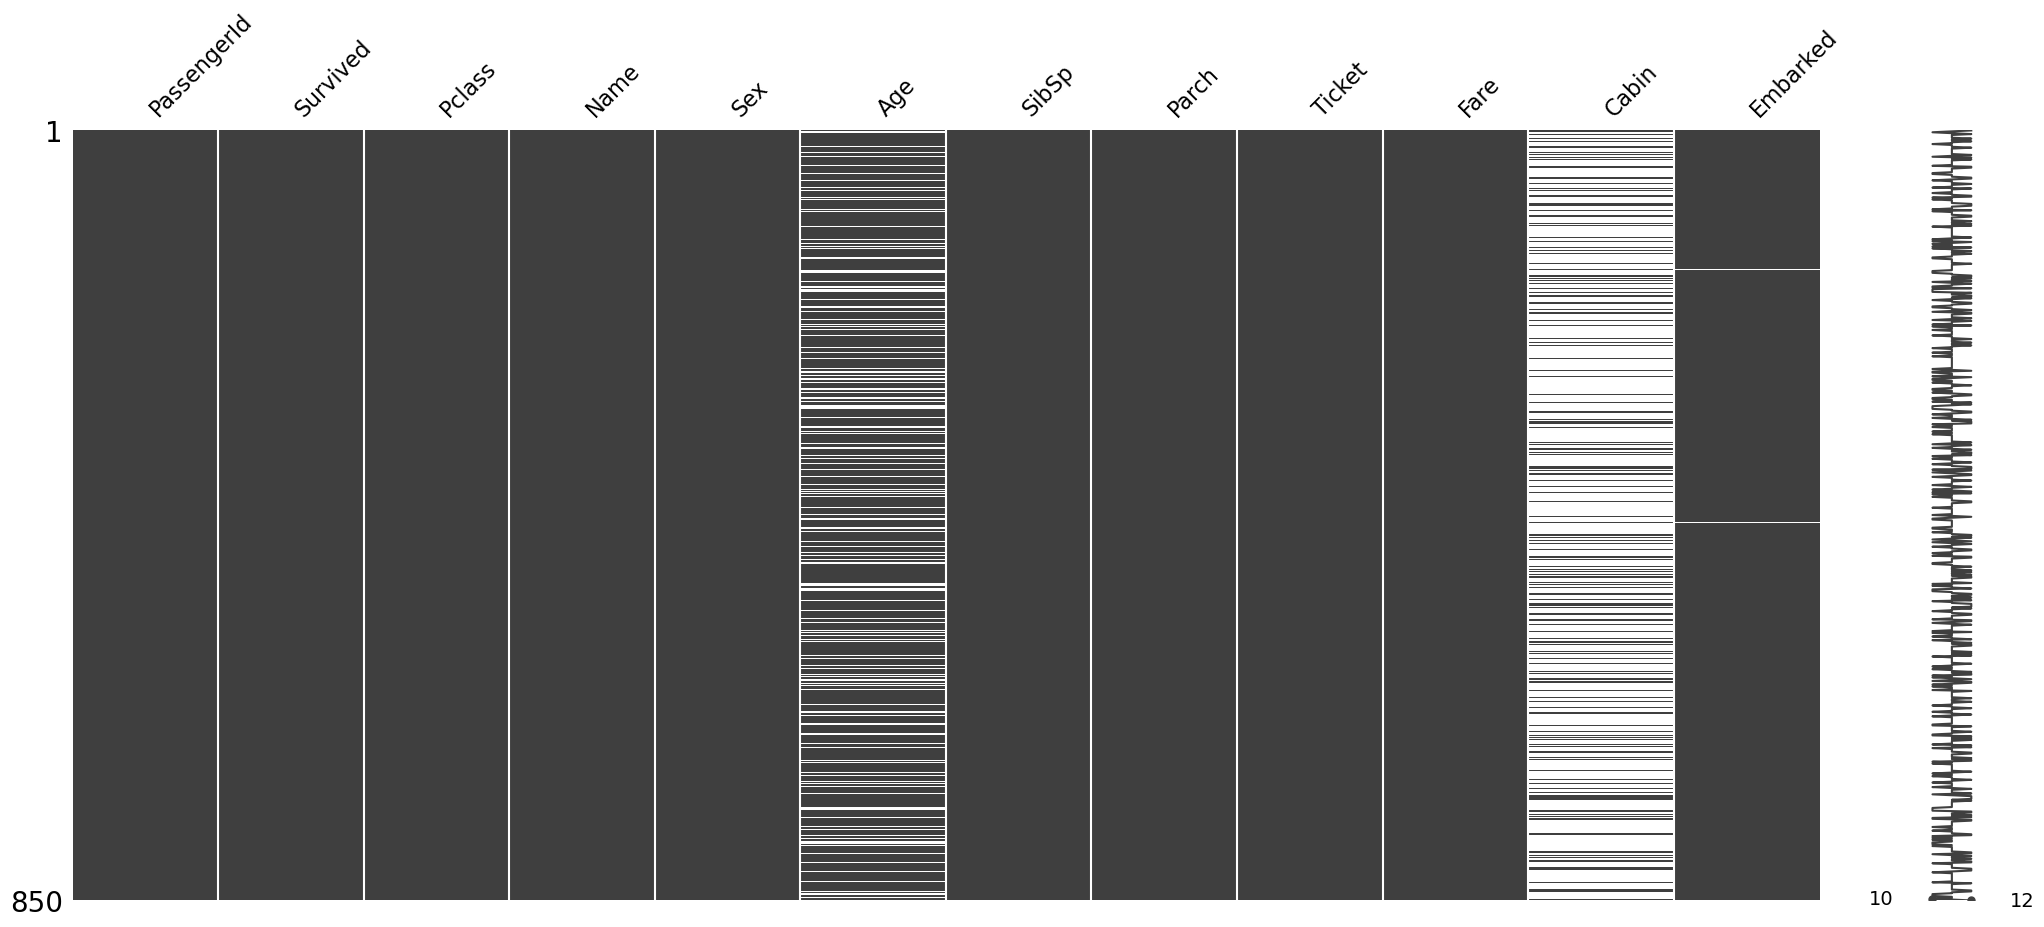

In [4]:
# Create a bar chart showing how many missing values are in each column

import missingno as msno
%matplotlib inline
msno.matrix(df.sample(850))

In [5]:
# Which column has the most NaN values? How many cells in that column are empty?
# Using the bar chart and the python build in function, it was determine that "Cabin" 
# column has the most null values. The 'Cabin' column has 687 missing values.

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

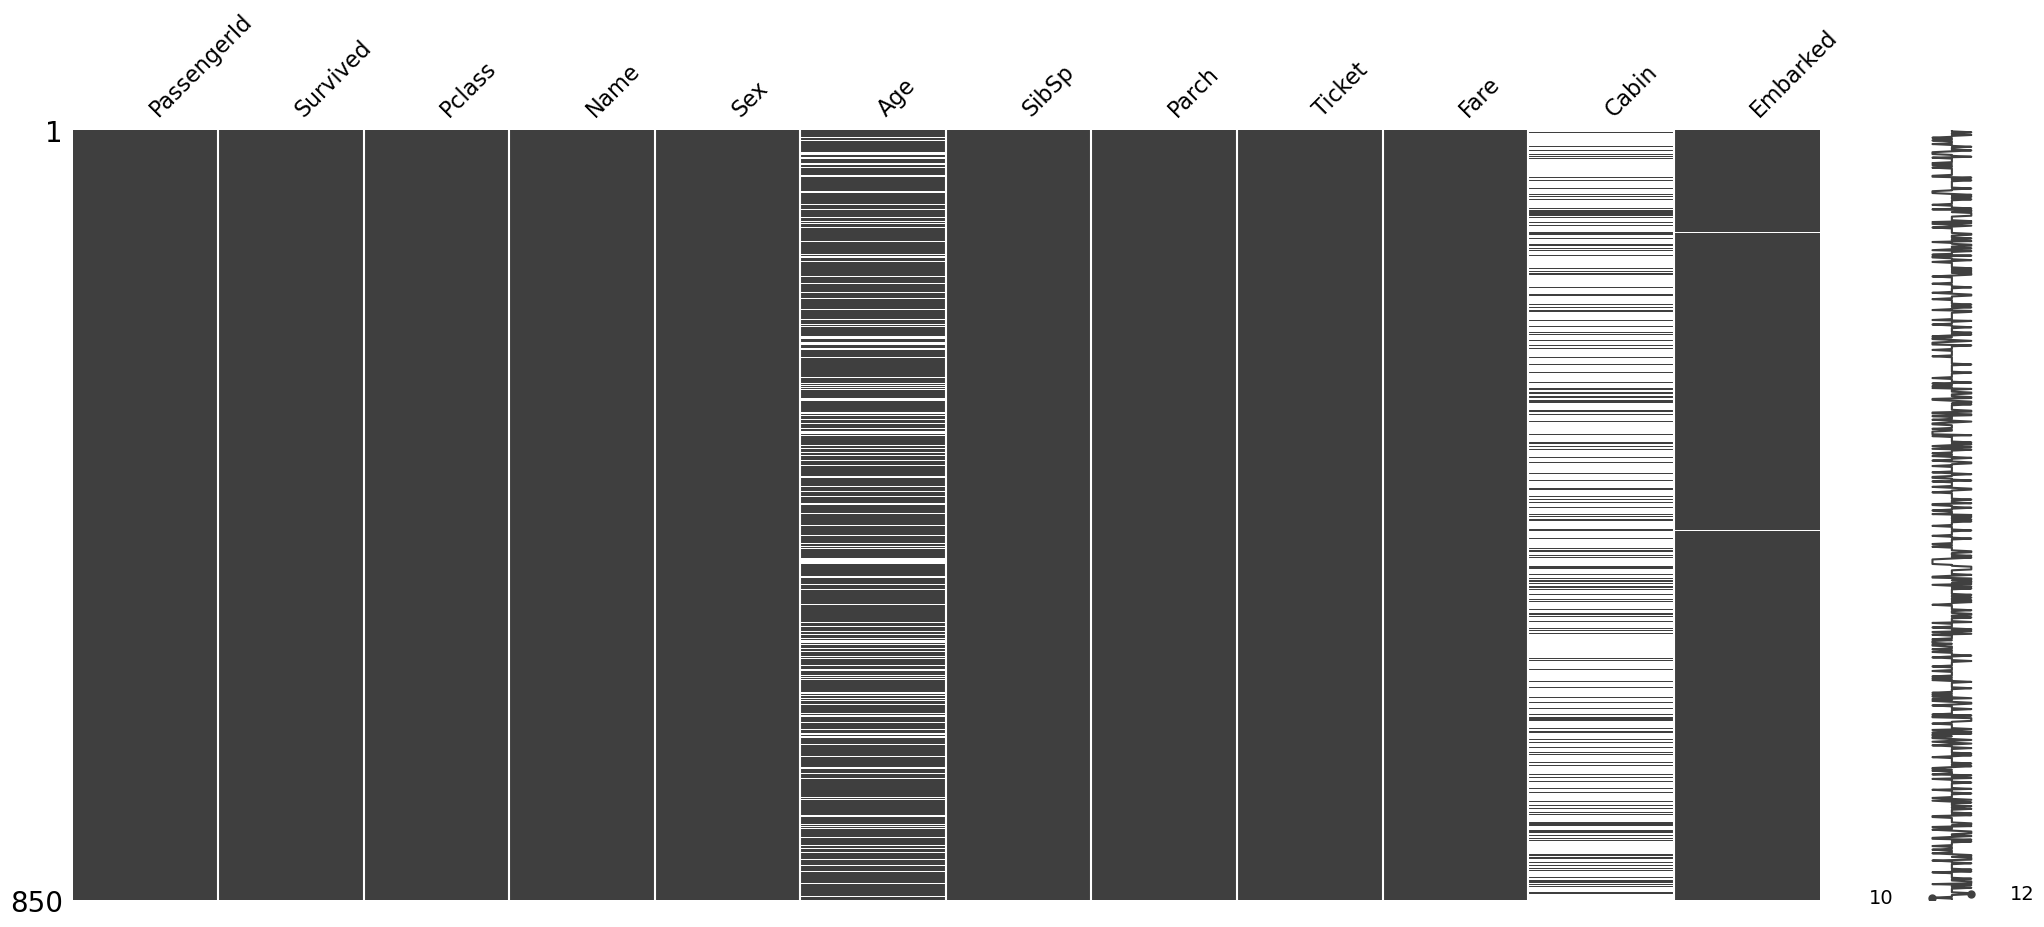

In [6]:
%matplotlib inline
msno.matrix(df.sample(850))

In [7]:
# Delete all rows where Embarked is empty

df = df.dropna(subset = 'Embarked', axis=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(889, 12)

In [9]:
# Fill all empty cabins with ¯\(ツ)/¯

df['Cabin'] = df['Cabin'].fillna('¯\(ツ)/¯')

# Step 3: Feature extraction

In [10]:
# There are two columns that pertain to how many family members are on the boat for a given person. 
# Create a new column called FamilyCount which will be the sum of those two columns.

df['FamilyCount'] = df['SibSp'] + df['Parch']

In [11]:
# Reverends have a special title in their name. 
#Create a column called IsReverend: 1 if they're a preacher, 0 if they're not

# Function to determine if the person is a reverend
def is_reverend(name):
    if 'Reverend' in name:
        return 1
    else:
        return 0

# Apply the function to create a new column
df['IsReverend'] = df['Name'].apply(is_reverend)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [13]:
# In order to feed our training data into a classification algorithm, 
# we need to convert our categories into 1's and 0's using pd.get_dummies

cat_var = df[['Sex', 'Embarked', 'Pclass']]
df_1 = pd.get_dummies(cat_var)
df_1

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,False,True,False,False,True
1,1,True,False,True,False,False
2,3,True,False,False,False,True
3,1,True,False,False,False,True
4,3,False,True,False,False,True
...,...,...,...,...,...,...
886,2,False,True,False,False,True
887,1,True,False,False,False,True
888,3,True,False,False,False,True
889,1,False,True,True,False,False


In [14]:
# Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. 
# These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column
# Do the same thing for Sex

df_1 = df_1.replace({False: 0, True: 1})
df_1.head()

,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,1,0,0,1
1,1,1,0,1,0,0
2,3,1,0,0,0,1
3,1,1,0,0,0,1
4,3,0,1,0,0,1


In [15]:
df_1.shape

(889, 6)

In [16]:
# BONUS: Extract the title from everyone's name and create dummy columns

# Extract titles from the 'Name' column. Titles usually follow a pattern like 'LastName, Title. FirstName'
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

# Create dummy variables for the extracted titles
df_2 = pd.get_dummies(df, columns=['Title'])

# Now df has additional columns for each title like 'Title_Mr', 'Title_Mrs', 'Title_Miss', etc.


In [118]:
df_2 = df_2.replace({False: 0, True: 1})
df_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,1,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,0,0,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,0,0,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,1,0,0,0,0


# Step 4: Exploratory analysis

In [125]:
# What was the survival rate overall?
over_sur = df['Survived'].mean()
over_sur

0.38245219347581555

In [22]:
# Which gender fared the worst? What was their survival rate?
df.groupby('Sex')['Survived'].mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

In [23]:
# What was the survival rate for each Pclass?
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [56]:
# Did any reverends survive? How many?
df[df['IsReverend'] == 1]['Survived'].sum() > 0
df[df['IsReverend'] == 1].shape[0]

0

In [86]:
# What is the survival rate for cabins marked ¯\(ツ)/¯

cab_ma_df = df[df['Cabin'] == '¯\(ツ)/¯']

cab_ma_df.groupby('Cabin')['Survived'].mean()

Cabin
¯\(ツ)/¯    0.299854
Name: Survived, dtype: float64

In [95]:
# What is the survival rate for people whose Age is empty?
age_empty_df = df[df['Age'].isna()]

age_empty_df['Survived'].mean()


0.2937853107344633

In [62]:
# What is the survival rate for each port of embarkation?
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [54]:
# What is the survival rate for children (under 12) in each Pclass?
children_df = df[df['Age'] < 12]

children_df.groupby('Pclass')['Survived'].mean()


Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [116]:
# Did the captain of the ship survive? Is he on the list?

# The captain of the ship did not survive. He is not on the list. The code return an empty DataFrame.
df[df['Name'] == 'Captain']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Title,FamilySize


In [114]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
peo_died = df[df['Survived'] == 0]
max_fare = peo_died['Fare'].max()
peo_max_fare = peo_died[peo_died['Fare'] == max_fare]
peo_max_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,Mr
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,Mr


In [115]:
# Does having family on the boat help or hurt your chances of survival?

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

family_survival = df.groupby('FamilySize')['Survived'].mean()
family_survival

FamilySize
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

Family Size of 1 survival rate is approximately **30.1%**. This indicates that solo passengers had a relatively lower chance of survival.

Family Size of 2-4 (Small Families) survival rates for these groups are significantly higher: **55.3%** for family size of 2, **57.8%** for family size of 3, and **72.4%** for family size of 4.
These numbers suggest that passengers with a small number of family members onboard had a higher chance of survival.

Family Size of 5-7 (Larger Families) survival rates drop for larger family sizes: **20.0%** for family size of 5, **13.6%** for family size of 6, **33.3%** for family size of 7.
This decrease might indicate that having a larger family on board could have made evacuation more difficult, or that these families were more likely to be in lower passenger classes, which had lower survival rates.

Family Size of 8 and 11 (Very Large Families): The survival rate is **0%** for these groups. This stark drop could be due to several reasons, such as these families being less likely to access lifeboats due to logistical challenges or being in lower passenger classes.

# Step 5: Plotting

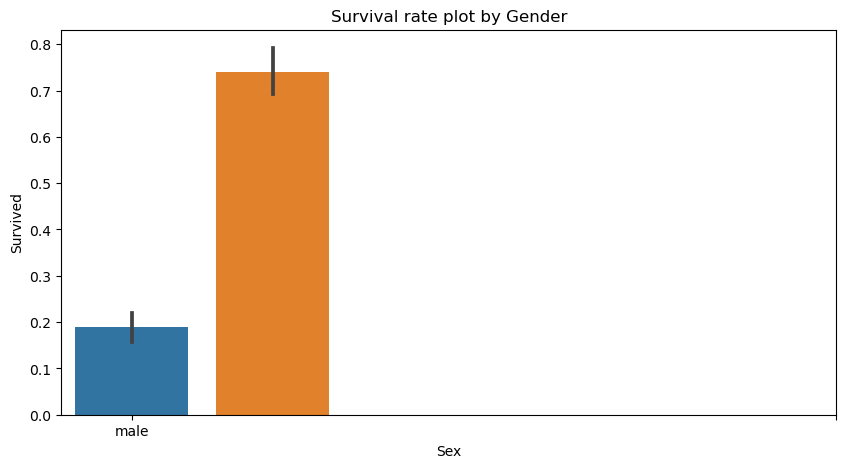

In [164]:
# Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. 
# It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something 
# beneath the surface.

# Survival rate plot by Gender
plt.figure(figsize=(10, 5))
sns.barplot(data = df, x='Sex', y='Survived')
plt.title('Survival rate by Gender')
plt.xticks([0, 5])
plt.show()

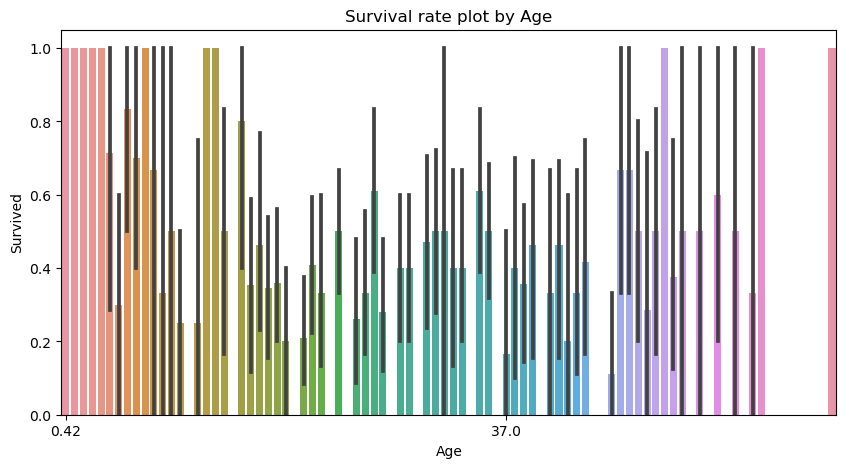

In [162]:
# Survival rate plot by Age

plt.figure(figsize=(10, 5))
sns.barplot(data = df, y='Survived', x='Age')
plt.title('Survival rate by Age')
plt.xticks([0, 50])
plt.show()

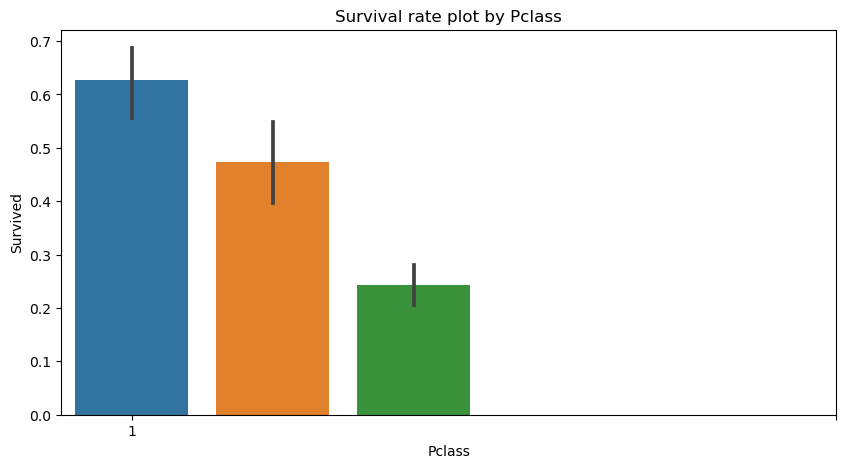

In [167]:
# Survival rate plot by Pclass

plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='Survived', x='Pclass')
plt.xticks([0, 5])
plt.title('Survival rate by Pclass')
plt.show()

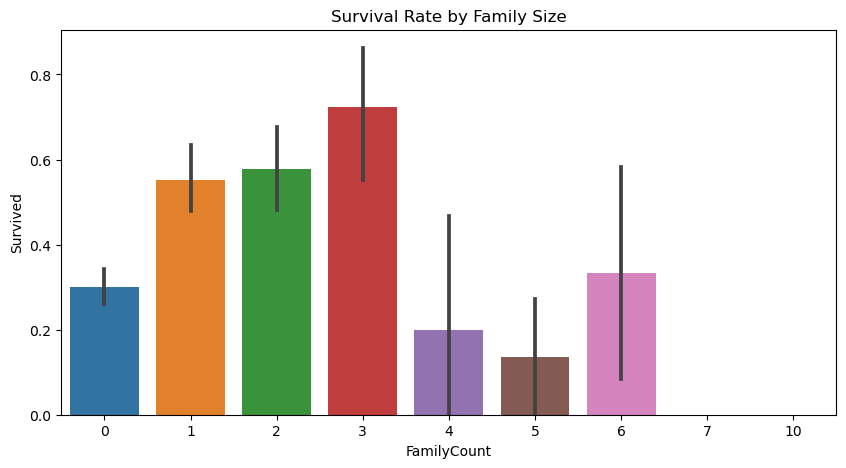

In [158]:
# Survival rate plot by familyCount

plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='Survived', x='FamilyCount')
plt.title("Survival Rate by Family Size")
plt.show()

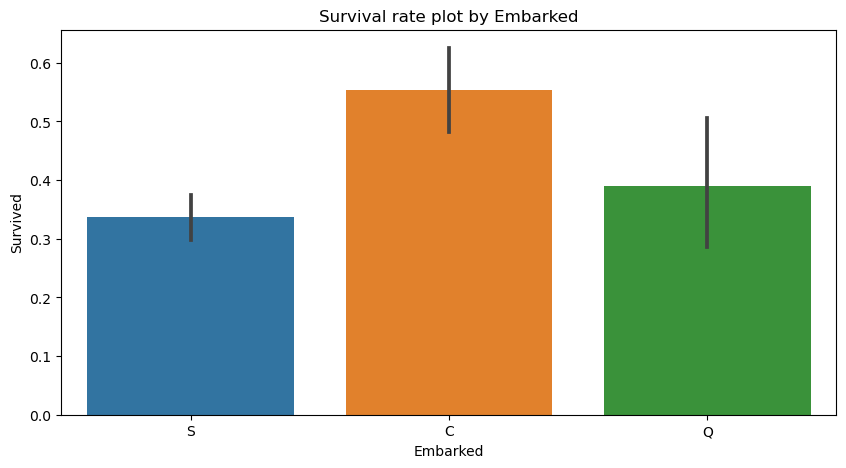

In [160]:
# Survival rate plot by Embarked

plt.figure(figsize=(10, 5))
sns.barplot(data=df, y='Survived', x='Embarked')
plt.title('Survival rate by Embarked')
plt.show()

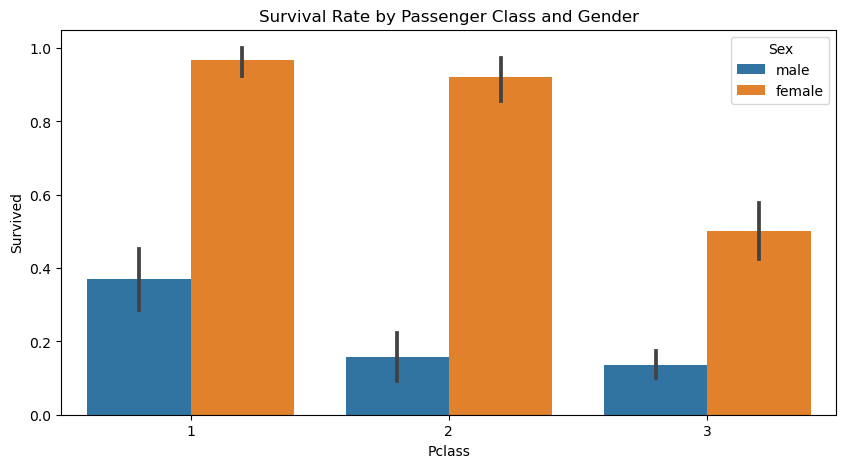

In [155]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=df)
plt.title("Survival Rate by Passenger Class and Gender")
plt.show()


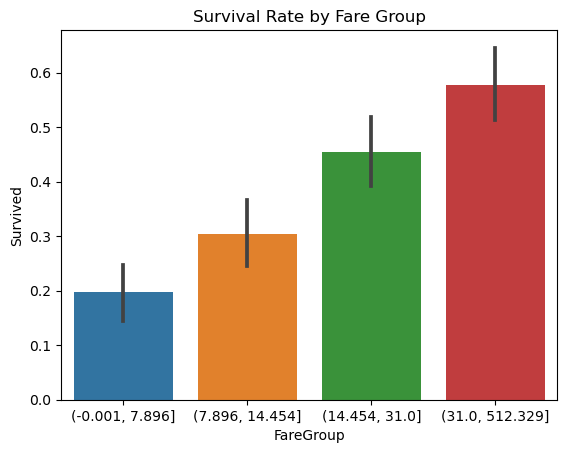

In [168]:
# Survival Rate by Fare Group

df['FareGroup'] = pd.qcut(df['Fare'], 4)  # Divide fare into quartiles

sns.barplot(x="FareGroup", y="Survived", data=df)
plt.title("Survival Rate by Fare Group")
plt.show()

